In [25]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [9]:
len(df.columns)

19

In [10]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df['duration'] = df.duration.dt.total_seconds() / 60

In [12]:
df.duration.mean()

15.668995167332046

In [13]:
df.duration.std()

42.594351241920904

In [17]:
print(round(len(df[(df.duration >= 1) & (df.duration <= 60)]) / len(df) * 100,2),'%')

98.12 %


In [19]:
df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

In [20]:
categorical = ['PULocationID', 'DOLocationID']

In [29]:
df[categorical] = df[categorical].astype(str)

In [30]:
df[categorical]

,PULocationID,DOLocationID
0,161,141
1,43,237
2,48,238
3,138,7
4,107,79
...,...,...
3066761,107,48
3066762,112,75
3066763,114,239
3066764,230,79


In [27]:
train_dicts = df[categorical].to_dict(orient='records')

In [28]:
train_dicts

[{'PULocationID': '161', 'DOLocationID': '141'},
 {'PULocationID': '43', 'DOLocationID': '237'},
 {'PULocationID': '48', 'DOLocationID': '238'},
 {'PULocationID': '138', 'DOLocationID': '7'},
 {'PULocationID': '107', 'DOLocationID': '79'},
 {'PULocationID': '161', 'DOLocationID': '137'},
 {'PULocationID': '239', 'DOLocationID': '143'},
 {'PULocationID': '142', 'DOLocationID': '200'},
 {'PULocationID': '164', 'DOLocationID': '236'},
 {'PULocationID': '141', 'DOLocationID': '107'},
 {'PULocationID': '234', 'DOLocationID': '68'},
 {'PULocationID': '79', 'DOLocationID': '264'},
 {'PULocationID': '164', 'DOLocationID': '143'},
 {'PULocationID': '138', 'DOLocationID': '33'},
 {'PULocationID': '33', 'DOLocationID': '61'},
 {'PULocationID': '79', 'DOLocationID': '186'},
 {'PULocationID': '90', 'DOLocationID': '48'},
 {'PULocationID': '113', 'DOLocationID': '255'},
 {'PULocationID': '237', 'DOLocationID': '239'},
 {'PULocationID': '143', 'DOLocationID': '229'},
 {'PULocationID': '137', 'DOLocat

In [31]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [32]:
X_train

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>

In [33]:
print(f'Feature matrix size: {X_train.shape}')

Feature matrix size: (3009173, 515)


In [34]:
target = 'duration'
y_train = df[target].values

In [35]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(X_train)
print(f'Train RMSE: {mean_squared_error(y_train, y_pred, squared=False)}')

Train RMSE: 7.649261027919939


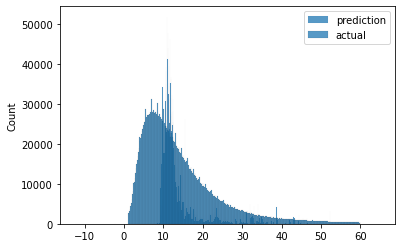

In [38]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')
plt.legend();

In [39]:
categorical = ['PULocationID', 'DOLocationID']
def read_data(filename):
    df = pd.read_parquet(filename)
    
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].astype('str')
    return df

In [40]:
df_val = read_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [41]:
df_val

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.40,3.50,0.5,0.00,0.0,1.0,9.40,2.5,0.00,1.683333
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.90,2.25,0.5,0.00,0.0,1.0,74.65,0.0,1.25,32.083333
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.00,1.00,0.5,3.30,0.0,1.0,25.30,2.5,0.00,13.300000
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,148,236,1,21.90,3.50,0.5,5.35,0.0,1.0,32.25,2.5,0.00,14.633333
6,1,2023-02-01 00:12:39,2023-02-01 00:40:36,1.0,8.90,1.0,N,137,244,1,41.50,3.50,0.5,3.50,0.0,1.0,50.00,2.5,0.00,27.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913950,2,2023-02-28 23:46:00,2023-03-01 00:05:00,NaN,4.65,NaN,None,249,140,0,20.22,0.00,0.5,4.84,0.0,1.0,29.06,NaN,NaN,19.000000
2913951,2,2023-02-28 23:26:02,2023-02-28 23:37:10,NaN,2.47,NaN,None,186,79,0,13.66,0.00,0.5,2.65,0.0,1.0,20.31,NaN,NaN,11.133333
2913952,2,2023-02-28 23:24:00,2023-02-28 23:38:00,NaN,3.49,NaN,None,158,143,0,17.64,0.00,0.5,0.00,0.0,1.0,21.64,NaN,NaN,14.000000
2913953,2,2023-02-28 23:03:00,2023-02-28 23:10:00,NaN,2.13,NaN,None,79,162,0,13.56,0.00,0.5,2.63,0.0,1.0,20.19,NaN,NaN,7.000000


In [42]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [43]:
val_dicts

[{'PULocationID': '142', 'DOLocationID': '163'},
 {'PULocationID': '132', 'DOLocationID': '26'},
 {'PULocationID': '161', 'DOLocationID': '145'},
 {'PULocationID': '148', 'DOLocationID': '236'},
 {'PULocationID': '137', 'DOLocationID': '244'},
 {'PULocationID': '263', 'DOLocationID': '141'},
 {'PULocationID': '48', 'DOLocationID': '243'},
 {'PULocationID': '114', 'DOLocationID': '211'},
 {'PULocationID': '114', 'DOLocationID': '249'},
 {'PULocationID': '125', 'DOLocationID': '107'},
 {'PULocationID': '140', 'DOLocationID': '42'},
 {'PULocationID': '140', 'DOLocationID': '226'},
 {'PULocationID': '249', 'DOLocationID': '90'},
 {'PULocationID': '234', 'DOLocationID': '4'},
 {'PULocationID': '114', 'DOLocationID': '125'},
 {'PULocationID': '132', 'DOLocationID': '239'},
 {'PULocationID': '132', 'DOLocationID': '230'},
 {'PULocationID': '140', 'DOLocationID': '68'},
 {'PULocationID': '144', 'DOLocationID': '79'},
 {'PULocationID': '132', 'DOLocationID': '90'},
 {'PULocationID': '236', 'DOL

In [46]:
X_val = dv.transform(val_dicts) 
y_val = df_val.duration.values

In [52]:
X_val

<2855951x515 sparse matrix of type '<class 'numpy.float64'>'
	with 5711894 stored elements in Compressed Sparse Row format>

In [53]:
y_val

array([ 1.68333333, 32.08333333, 13.3       , ..., 14.        ,
        7.        ,  9.8       ])

In [50]:
y_pred = lr.predict(X_val)

In [54]:
print(f'Val RMSE: {mean_squared_error(y_val, y_pred, squared=False)}')

Val RMSE: 7.811832638273232
